# Project 3 - Supervised Machine Learning : Classification

Data source: https://archive.ics.uci.edu/dataset/2/adult

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(palette="pastel")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [33]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

data = pd.read_csv('data/adult.data', names=columns)

data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [34]:
data['income'] = pd.Series([x.strip() for x in data['income']])
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [36]:
data['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [37]:
data['education'].value_counts()

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [38]:
data['marital-status'].value_counts()

marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

In [39]:
data['occupation'].value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [40]:
data['relationship'].value_counts()

relationship
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: count, dtype: int64

# Exploratory Data Analysis

In [41]:
data1 = data.copy()

In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data1.workclass = le.fit_transform(data1.workclass)
data1['marital-status'] = le.fit_transform(data1['marital-status'])
data1['occupation'] = le.fit_transform(data1['occupation'])
data1['relationship'] = le.fit_transform(data1['relationship'])
data1['race'] = le.fit_transform(data1['race'])
data1['sex'] = le.fit_transform(data1['sex'])
data1['native-country'] = le.fit_transform(data1['native-country'])
data1['income'] = le.fit_transform(data1['income'])

data1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,Bachelors,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,Bachelors,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,HS-grad,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,11th,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,Bachelors,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,Assoc-acdm,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,HS-grad,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,HS-grad,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,HS-grad,9,4,1,3,4,1,0,0,20,39,0


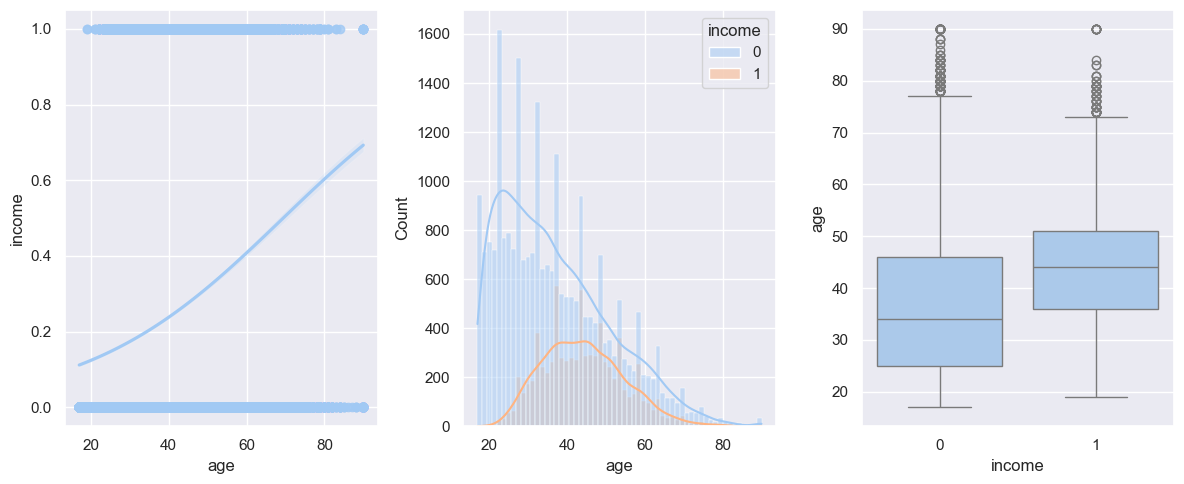

In [43]:
fig, axes = plt.subplots(1,3, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['age'], 
            logistic=True, ax=axes[0])
sns.histplot(data=data1, x='age', hue='income',kde=True, ax= axes[1])
sns.boxplot(data=data1, x='income', y='age', ax=axes[2])

plt.tight_layout()

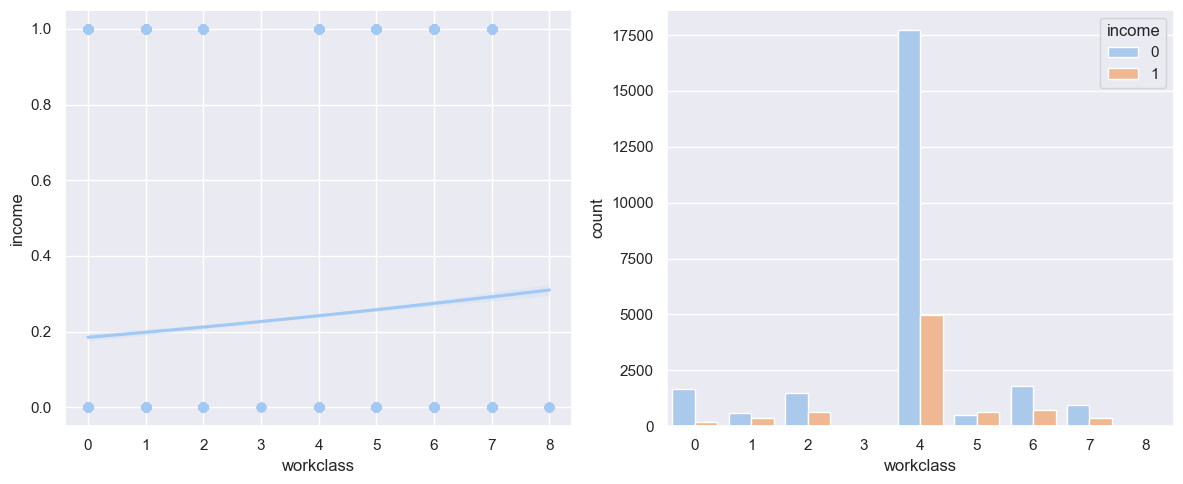

In [62]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['workclass'], 
            logistic=True, ax=axes[0])
sns.countplot(data=data1, x='workclass', hue='income', ax= axes[1])

plt.tight_layout()

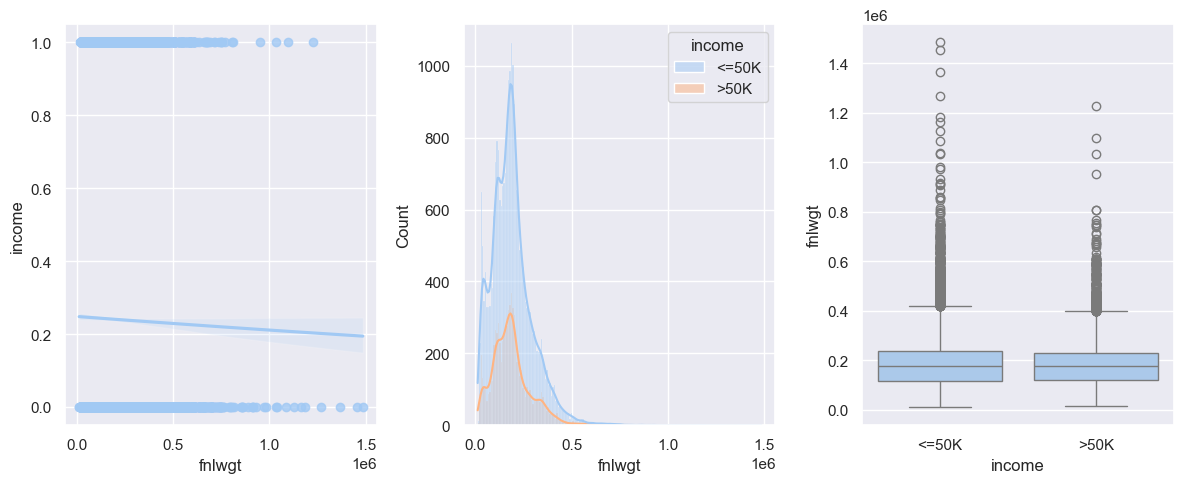

In [18]:
fig, axes = plt.subplots(1,3, figsize=(12,5))

sns.regplot(y=data['income'].replace(['<=50K','>50K'], [0,1]),
            x=data['fnlwgt'], 
            logistic=True, ax=axes[0])
sns.histplot(data=data, x='fnlwgt', hue='income',kde=True, ax= axes[1])
sns.boxplot(data=data, x='income', y='fnlwgt', ax=axes[2])

plt.tight_layout()

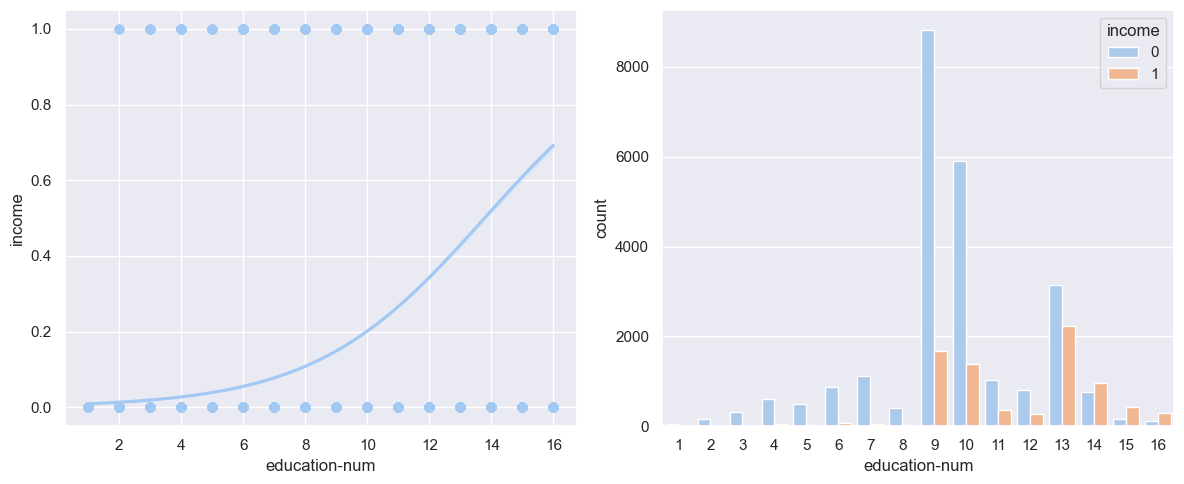

In [63]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['education-num'], 
            logistic=True, ax=axes[0])
sns.countplot(data=data1, x='education-num', hue='income' ,ax=axes[1])

plt.tight_layout()

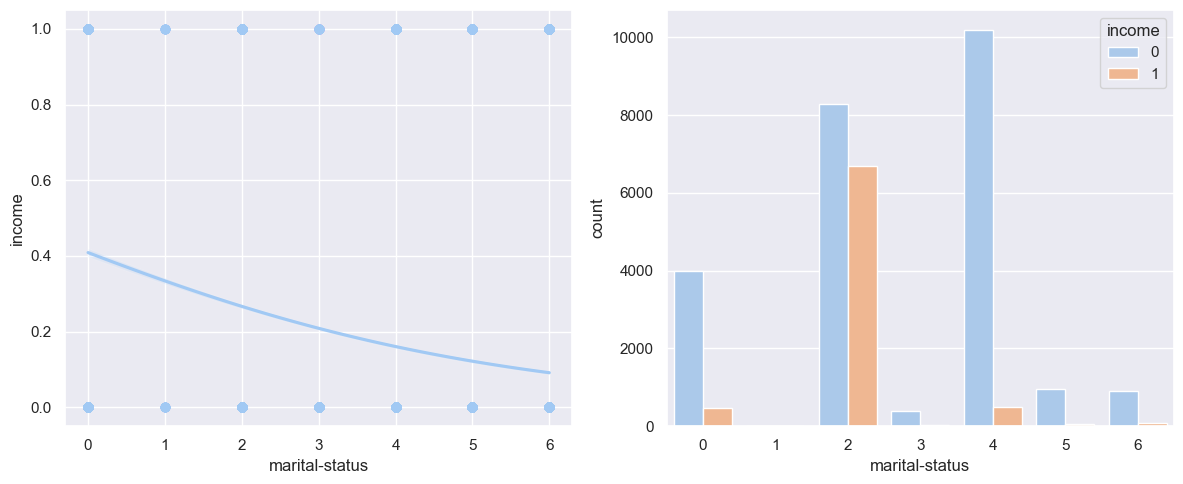

In [64]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['marital-status'], 
            logistic=True, ax=axes[0])
sns.countplot(data=data1, x='marital-status', hue='income' ,ax=axes[1])

plt.tight_layout()

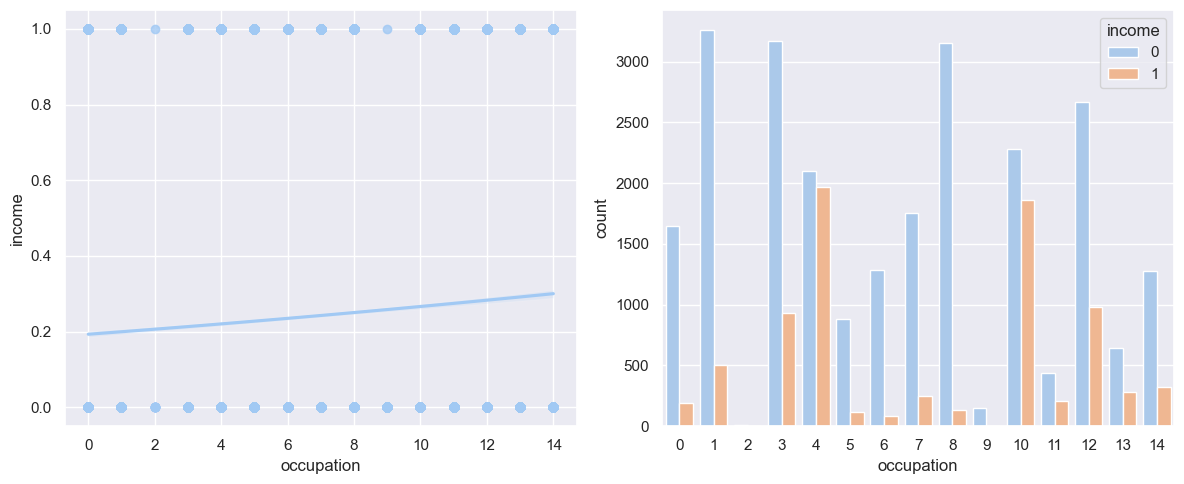

In [65]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['occupation'], 
            logistic=True, ax=axes[0])
sns.countplot(data=data1, x='occupation', hue='income' ,ax=axes[1])

plt.tight_layout()

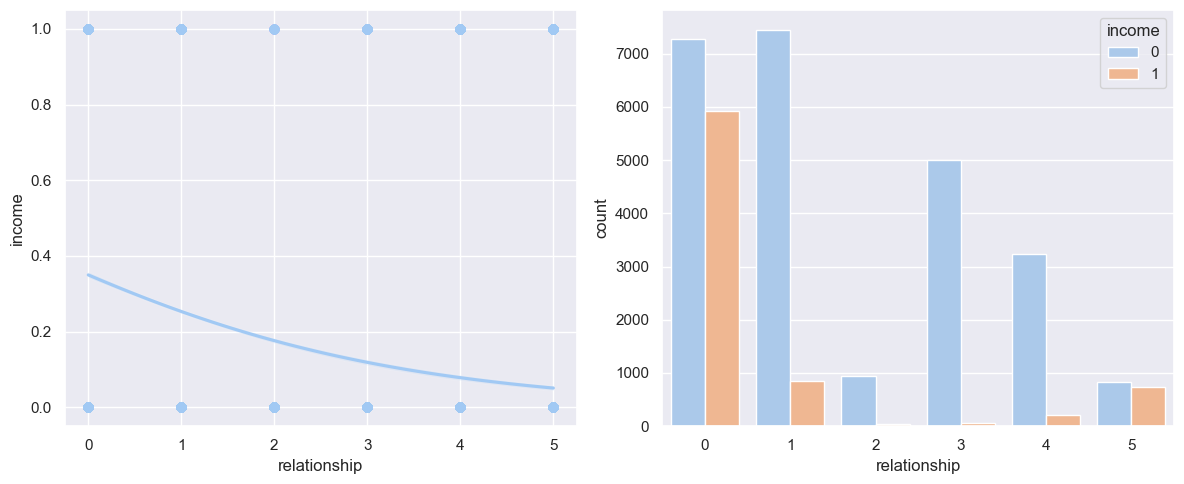

In [66]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['relationship'], 
            logistic=True, ax=axes[0])
sns.countplot(data=data1, x='relationship', hue='income' ,ax=axes[1])

plt.tight_layout()

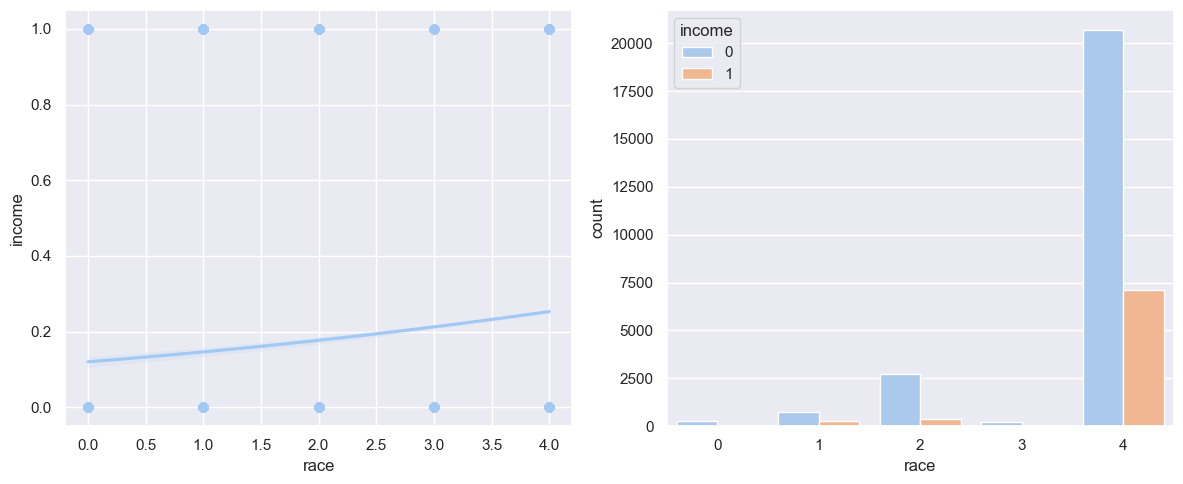

In [67]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['race'], 
            logistic=True, ax=axes[0])
sns.countplot(data=data1, x='race', hue='income' ,ax=axes[1])

plt.tight_layout()

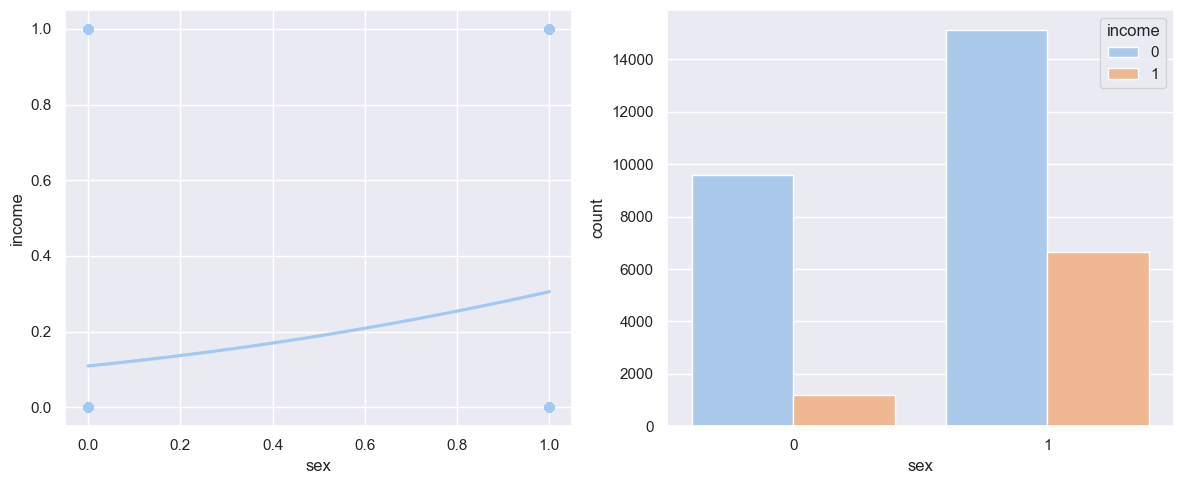

In [68]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['sex'], 
            logistic=True, ax=axes[0])
sns.countplot(data=data1, x='sex', hue='income' ,ax=axes[1])

plt.tight_layout()

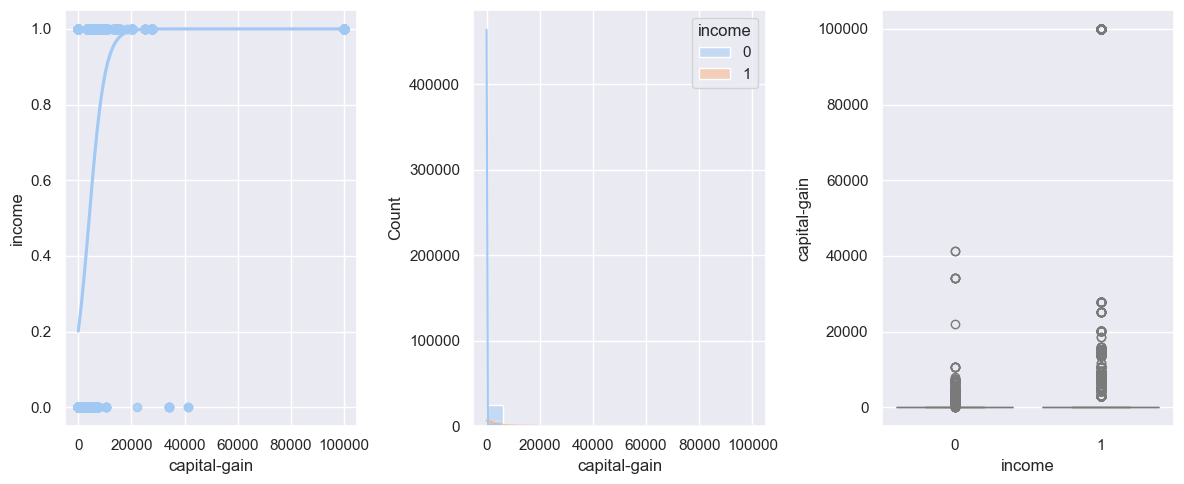

In [69]:
fig, axes = plt.subplots(1,3, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['capital-gain'], 
            logistic=True, ax=axes[0])
sns.histplot(data=data1, x='capital-gain', hue='income',kde=True, ax= axes[1])
sns.boxplot(data=data1, x='income', y='capital-gain', ax=axes[2])

plt.tight_layout()

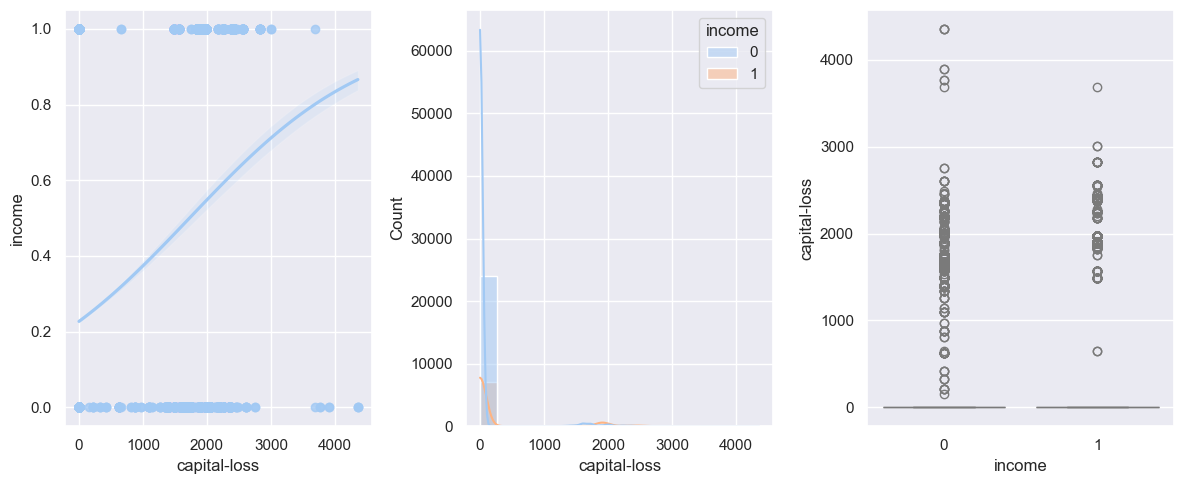

In [70]:
fig, axes = plt.subplots(1,3, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['capital-loss'], 
            logistic=True, ax=axes[0])
sns.histplot(data=data1, x='capital-loss', hue='income',kde=True, ax= axes[1])
sns.boxplot(data=data1, x='income', y='capital-loss', ax=axes[2])

plt.tight_layout()

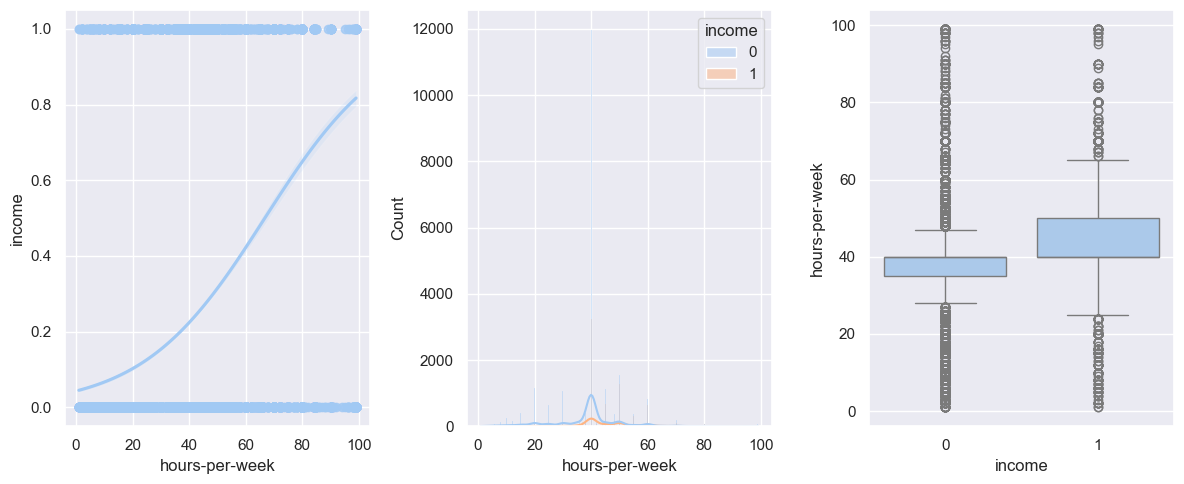

In [71]:
fig, axes = plt.subplots(1,3, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['hours-per-week'], 
            logistic=True, ax=axes[0])
sns.histplot(data=data1, x='hours-per-week', hue='income',kde=True, ax= axes[1])
sns.boxplot(data=data1, x='income', y='hours-per-week', ax=axes[2])

plt.tight_layout()

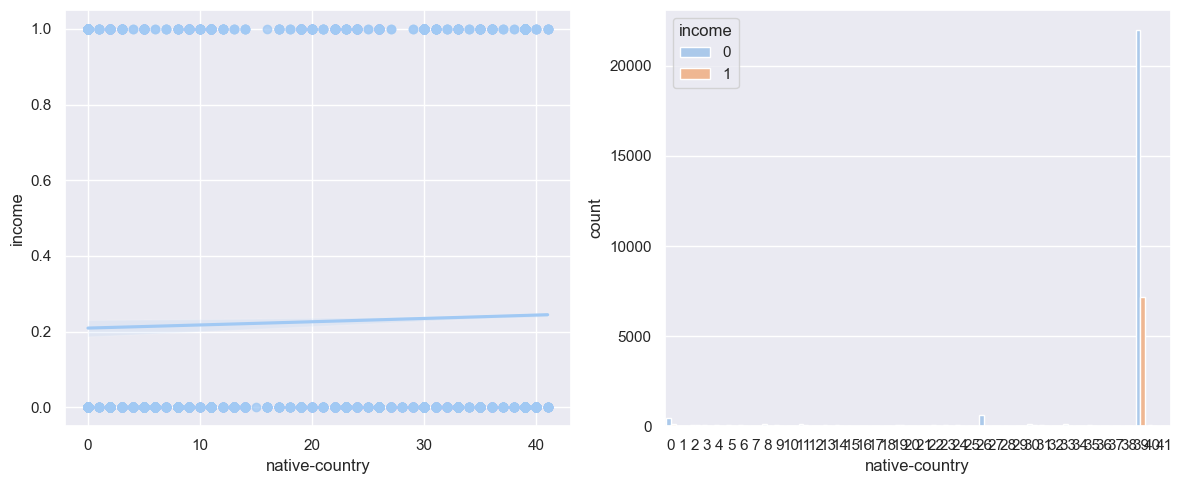

In [72]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.regplot(y=data1['income'],
            x=data1['native-country'], 
            logistic=True, ax=axes[0])
sns.countplot(data=data1, x='native-country', hue='income' ,ax=axes[1])

plt.tight_layout()

<Axes: ylabel='income'>

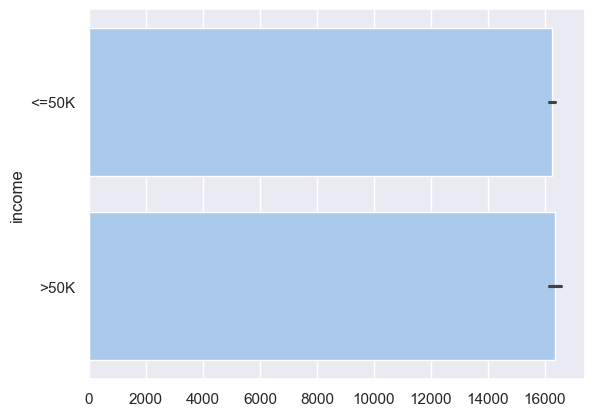

In [75]:
sns.barplot(data['income'])

In [109]:
data2 = data1.drop('education', axis=1)
data2

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,9,4,1,3,4,1,0,0,20,39,0


In [115]:
X = data2.drop('income',axis=1)
y = data2['income']

# Modelling

In [116]:
from sklearn.model_selection import train_test_split

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

test = pd.read_csv('data/adult.test', names=columns)
test = test.drop(0)

X_test = test.drop('income',axis=1)
y_test = test['income']

X_train, X_val, y_train, y_val = train_test_split(X,y, stratify=y, test_size=.3, random_state=42)

In [117]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 660.6 kB/s eta 0:02:31
   ---------------------------------------- 0.1/99.8 MB 871.5 kB/s eta 0:01:55
   ---------------------------------------- 0.3/99.8 MB 2.3 MB/s eta 0:00:45
   ---------------------------------------- 0.7/99.8 MB 3.9 MB/s eta 0:00:26
    --------------------------------------- 1.3/99.8 MB 5.5 MB/s eta 0:00:18
    --------------------------------------- 1.7/99.8 MB 6.0 MB/s eta 0:00:17
    --------------------------------------- 2.0/99.8 MB 6.1 MB/s eta 0:00:17
    --------------------------------------- 2.3/99.8 MB 6.1 MB/s eta 0:00:17
   - ------------------------------

In [120]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

xgb = XGBClassifier()
kfold = KFold(n_splits=3, random_state=42, shuffle=True)
f1score = cross_val_score(xgb, X_train,y_train, cv=kfold, scoring='f1')
f1score

array([0.69819277, 0.71030232, 0.71188373])

In [121]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method="hist")
kfold = KFold(n_splits=3, random_state=42, shuffle=True)
f1score = cross_val_score(xgb, X_train,y_train, cv=kfold, scoring='f1')
f1score

array([0.69819277, 0.71030232, 0.71188373])

In [126]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

kfold = KFold(n_splits=3, random_state=42, shuffle=True)
f1score = cross_val_score(XGBClassifier(tree_method="hist").fit(X_train,y_train), X_val,y_val, cv=kfold, scoring='f1')
f1score

array([0.70910335, 0.67867036, 0.68974881])

In [124]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method="hist")
kfold = KFold(n_splits=3, random_state=42, shuffle=True)
f1score = cross_val_score(xgb, X_val,y_val, cv=kfold, scoring='f1')
f1score

array([0.70910335, 0.67867036, 0.68974881])